In [1]:
import sys
sys.path.insert(0, '..')

from multipliers import RSRBinaryMultiplier, RSRTernaryMultiplier, NaiveMultiplier

import math
import numpy as np
import tracemalloc

In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [3]:
n_s = [2**i for i in range(11, 17)]

In [4]:
k_optimals = {
    "rsrpp" : [5, 6, 8, 8, 9, 10],
    "rsr": [4, 4, 5, 6, 6, 6]
}

In [5]:
binary_matrices = [generate_random_binary_matrix(n) for n in n_s]

In [6]:
naive_usage = [NaiveMultiplier(A) for A in binary_matrices]

In [7]:
rsr_usage = [RSRBinaryMultiplier(A, k=k_optimals.get("rsr")[i]) for i, A in enumerate(binary_matrices)]

Total memory for blocks_permutations: 8601736 bytes
Total memory for blocks_permutations: 33981096 bytes
Total memory for blocks_permutations: 108306384 bytes
Total memory for blocks_permutations: 360143728 bytes
Total memory for blocks_permutations: 1436203608 bytes
Total memory for blocks_permutations: 5735544720 bytes


In [10]:
naive_binary_memory = [sys.getsizeof(A) / (1024 ** 2) for A in binary_matrices]

In [11]:
rsr_binary_memory = [i/(1024 ** 2) for i in [8601736, 33981096, 108306384, 360143728, 1436203608, 5735544720]]
rsr_binary_memory

[8.203254699707031,
 32.406898498535156,
 103.28901672363281,
 343.45982360839844,
 1369.6704940795898,
 5469.841690063477]

In [12]:
rsr_memory_peak = [n + a for n,a in zip(naive_binary_memory, rsr_binary_memory)]

In [13]:
ratio = [n/r for r,n in zip(rsr_binary_memory, naive_binary_memory)]
ratio

[3.9009055846401237,
 3.949780077723214,
 4.9569657869844495,
 5.9628520755469046,
 5.981000654887646,
 5.990667002592912]

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

In [15]:
binary_df = pd.DataFrame({"rsr_final": rsr_binary_memory,"rsr_peak": rsr_memory_peak, "naive": naive_binary_memory, "ratio": ratio, "vector_lengths": n_s})

In [16]:
def plot(df, filename: str):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

    vector_lengths = df['vector_lengths']  # Length of each vector
    speedup = df['ratio']
    naive_times = df['naive']
    rsr_current = df['rsr_final']
    rsr_peak = df['rsr_peak']
    # Create the plot with improved aesthetics
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(10, 7))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(vector_lengths, naive_times, label='NumPy', marker='o',  linewidth=3.5, markersize=12)
    plt.plot(vector_lengths, rsr_current, label='RSR (final usage)', marker='o',  linewidth=3.5, markersize=12)
    plt.plot(vector_lengths, rsr_peak, label='RSR (peak usage)', marker='o',  linewidth=3.5, markersize=12)


    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(vector_lengths)):
        plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_current[i]], 
                color='black', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(vector_lengths):
        plt.text(length, (naive_times[i] + rsr_current[i]) / 2, f"{speedup[i]:.2f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    plt.xlabel('$n$ ($\log_{{2}} scale$)')
    plt.ylabel('Memory Usage ($\log_{{10}}$ scale, MB)')
    # plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
    plt.legend()

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3115742/3841844302.py:43: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$n$ ($\log_{{2}} scale$)')
/tmp/ipykernel_3115742/3841844302.py:44: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('Memory Usage ($\log_{{10}}$ scale, MB)')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


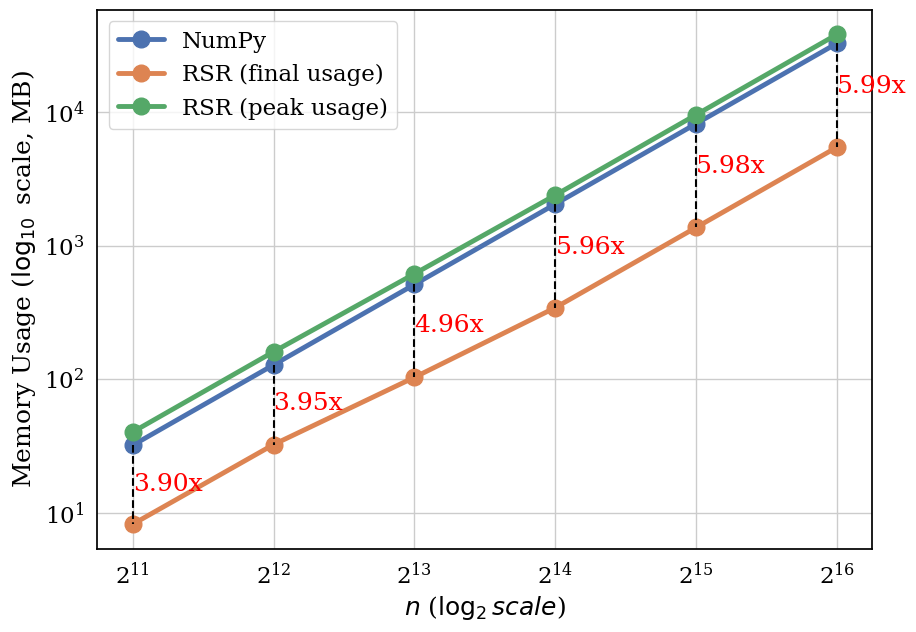

In [17]:
plot(binary_df, "figures/memory_binary")